IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME10: apprentissage supervisé appliqué à un dataset

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Manea Dorin-Mihai

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-10-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# TDTME 10 - mini-projet 2024


<font size="+1" color="RED"><b>Date de rendu : lundi 29 avril 2024, avant 19h</b></font>
    
<b>Attention!</b> les soumissions après lundi 29 avril 19h se verront appliquer un malus dans la note:
- retard de moins d'une heure : 0 malus
- retard entre 1h et 24h : malus de 2pts
- retard entre 24h à 48h : malus de 5pts
- retard supérieur à 48h : noté 0.


## Travail à faire

Appliquer les algorithmes d'**apprentissage supervisé** vus depuis le début du semestre sur les données afin de mettre en évidence des résultats intéressants (temps d'exécution, taux de bonne classification,...).
Vous devez utiliser tout ce qui a été fait dans les séances de TDTME 1 à 8 et vous devez comparer les algorithmes suivantes:
- les k plus proches voisins
- le perceptron (n'importe quelle variante)
- les arbres de décision

Votre comparaison doit utiliser une validation croisée.


## Travail à rendre

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage.

Ce qui doit être remis : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.

**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [15]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.


In [5]:
pip install -U ucimlrepo

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

### Chargement des données

In [16]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

# check which datasets can be imported
# list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

In [3]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


In [4]:
y

,Class
0,8
1,2
2,1
3,4
4,1
...,...
10987,4
10988,2
10989,0
10990,0


In [5]:
np.unique(y.Class)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Expérimentations

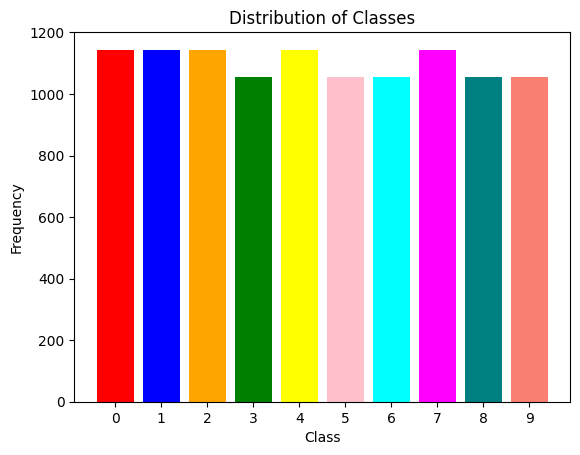

In [17]:
noms = [nom for nom in X.columns]

# Passer du dataframe à des arrays:
desc = np.array(X[noms])
label = np.array(y['Class'])

# mélanger les données au départ
index = np.random.permutation(len(desc)) # mélange des index
Xm = desc[index]
Ym = label[index]

# dimension des données
n = desc.shape[0]
classes, class_counts = np.unique(y.Class, return_counts=True)
nb_classes = len(classes)

plt.bar(classes, class_counts, color=['red', 'blue', 'orange', 'green', 'yellow', 'pink', 'aqua', 'magenta', 'teal', 'salmon'])
plt.xticks(classes)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

Par conséquent, les données sont uniformément réparties, surtout après le mélange.

In [37]:
import seaborn as sns

Text(0.5, 1.0, 'Correlogram')

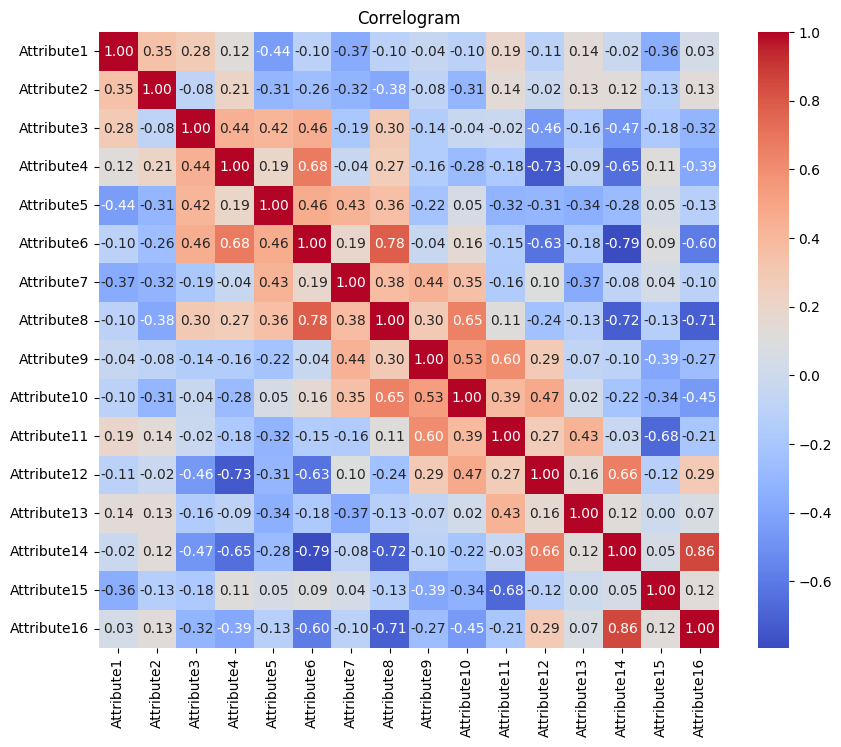

In [40]:
# correlation matrix
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlogram')

Les attributs indexés avec des nombres adjacents sont plus positivement corrélés, et ceux indexés avec des nombres éloignés sont plus négativement corrélés. Cependant, ces corrélations sont pour la plupart au maximum modérées et pas vraiment fortes.

### KNN

In [22]:
valeurs_k = np.linspace(5, n//10, 10, dtype=int)
accuracies = []
ecarts = []
times = []
nb_iter = 10

for k in valeurs_k:
    classifierKNN_k = classif.ClassifierKNN_MC(Xm.shape[1], k, nb_classes)

    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(classifierKNN_k, (Xm, Ym), nb_iter)
    toc = time.time()  # On arrête le chrono
    accuracies.append(taux_moyen)
    ecarts.append(taux_ecart)
    times.append(toc-tic)

    print(f'Temps passe: {(toc-tic):0.4f} secondes.')
    print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\n')

Itération 0: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9954
Itération 1: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9881
Itération 2: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9927
Itération 3: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9973
Itération 4: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9918
Itération 5: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9918
Itération 6: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9936
Itération 7: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9890
Itération 8: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9954
Itération 9: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9927
Temps passe: 11.2721 secondes.
Analyse perf: moyenne: 0.9928	ecart: 0.0027

Itération 0: taille base app.= 989

In [25]:
df_res = pd.DataFrame({'k': [k for k in valeurs_k],
                       'Accuracy': [acc for acc in accuracies],
                       'Std Deviation': [s for s in ecarts],
                       'Time': [t for t in times]})
print("Temps moyen :", np.array(times).mean())
df_res

Temps moyen : 10.946397590637208


,k,Accuracy,Std Deviation,Time
0,5,0.992785,0.002692,11.272100
1,126,0.948584,0.004530,10.730803
2,248,0.901735,0.004714,10.755698
3,369,0.870959,0.006773,10.891589
4,491,0.848676,0.006944,10.786700
5,612,0.831324,0.008400,10.850701
6,734,0.817534,0.007584,10.953045
7,855,0.802283,0.006601,10.911911
8,977,0.783836,0.005341,11.191238
9,1099,0.768584,0.007216,11.120189


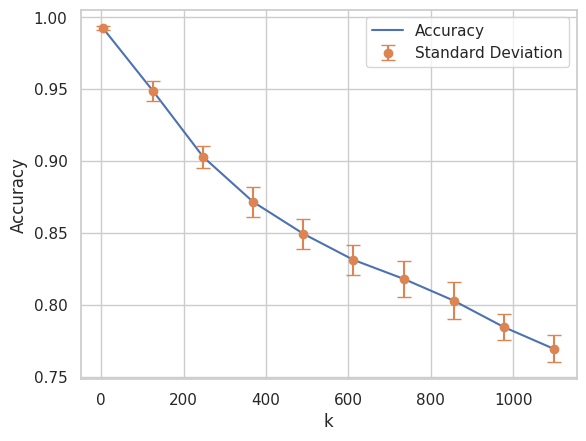

In [58]:
sns.lineplot(x="k", y="Accuracy", data=df_res, label="Accuracy")
plt.errorbar(x=df_res["k"], y=df_res["Accuracy"], yerr=df_res["Std Deviation"], fmt='o', capsize=5, label="Standard Deviation")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(0.0, 12.399309706687928)

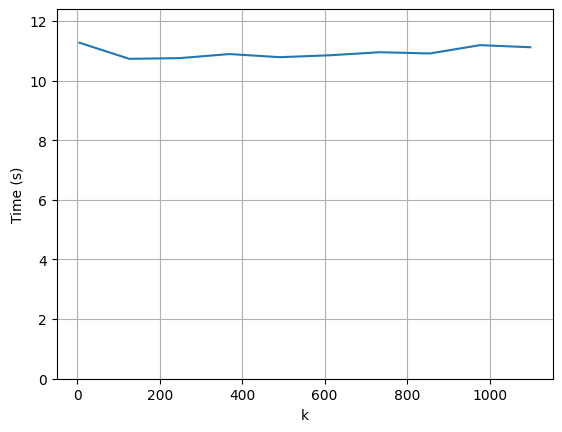

In [35]:
plt.plot(valeurs_k, times)
plt.grid()
plt.xlabel('k')
plt.ylabel('Time (s)')
plt.ylim(0, max(times) * 1.1) 

On peut observer que la précision diminue presque linéairement lorsque le hyperparamètre $k$ est incrémenté, mais la vitesse d'exécution reste constante et assez rapide, autour de $11$ secondes pour $10$ itérations lors de la validation croisée.
Étant donné la dimension des données, je crois que $k=\sqrt{n}=104$ offre un bon compromis et ne surapprend pas ou sousapprend le jeu de données d'apprentissage. Il atteint une précision de $95.5$% et l'algorithme est très robuste (écart $0.004$).

In [26]:
tic = time.time()
perf, taux_moyen, taux_ecart = ev.validation_croisee(classif.ClassifierKNN_MC(Xm.shape[1], 104, nb_classes), (Xm, Ym), nb_iter)
toc = time.time()

print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\n')

Itération 0: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9553
Itération 1: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9498
Itération 2: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9562
Itération 3: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9607
Itération 4: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9516
Itération 5: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9562
Itération 6: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9489
Itération 7: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9598
Itération 8: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9562
Itération 9: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9571
Temps passe: 10.9195 secondes.
Analyse perf: moyenne: 0.9552	ecart: 0.0038



### Perceptron

La précision du perceptron normal reste constante, relativement robuste et assez élevée avec l'evolution d'epsilon. Néanmoins, elle est inférieure à celle du KNN (pour $k$ relativement petit) et beaucoup plus chronophage (temps moyen $170$-$174$ s), même avec seulement $3$ itérations pour la validation croisée. Comment le tableau de poids est initialisé ne semble pas non plus influencer la précision.
Le perceptron qui présente le meilleur compromis entre la précision, la vitesse et le taux d'apprentissage est celui avec $eps=0.05$, les poids nuls ce qui donne une précision de $89.3$%, écart $0.012$ dans un temps de $168.1$ s.

#### w initialisé à 0

In [89]:
valeurs_eps = np.linspace(1e-3, 1e-1, 5)
accuracies = []
ecarts = []
times = []
nb_iter = 3
poids_0 = True

for eps in valeurs_eps:
    perceptron = classif.ClassifierPerceptron(Xm.shape[1], eps, poids_0)
    perceptron_multiOAA = classif.ClassifierMultiOAA(perceptron)

    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(perceptron_multiOAA, (Xm, Ym), nb_iter)
    toc = time.time()  # On arrête le chrono
    accuracies.append(taux_moyen)
    ecarts.append(taux_ecart)
    times.append(toc-tic)

    print(f'Temps passe: {(toc-tic):0.4f} secondes.')
    print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\n')

Itération 0: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8880
Itération 1: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8478
Itération 2: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8691
Temps passe: 171.4941 secondes.
Analyse perf: moyenne: 0.8683	ecart: 0.0164

Itération 0: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8877
Itération 1: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8918
Itération 2: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8653
Temps passe: 167.4973 secondes.
Analyse perf: moyenne: 0.8816	ecart: 0.0116

Itération 0: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.9052
Itération 1: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8962
Itération 2: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8779
Temps passe: 168.1278 secondes.
Analyse perf:

In [90]:
df_res = pd.DataFrame({'Learning Rate': [eps for eps in valeurs_eps],
                       'Accuracy': [acc for acc in accuracies],
                       'Std Deviation': [s for s in ecarts],
                       'Time': [t for t in times]})
print("Temps moyen :", np.array(times).mean())
df_res

Temps moyen : 168.97697672843933


,Learning Rate,Accuracy,Std Deviation,Time
0,0.00100,0.868306,0.016407,171.494066
1,0.02575,0.881603,0.011648,167.497334
2,0.05050,0.893078,0.011367,168.127793
3,0.07525,0.888707,0.011850,168.289241
4,0.10000,0.889435,0.016708,169.476450


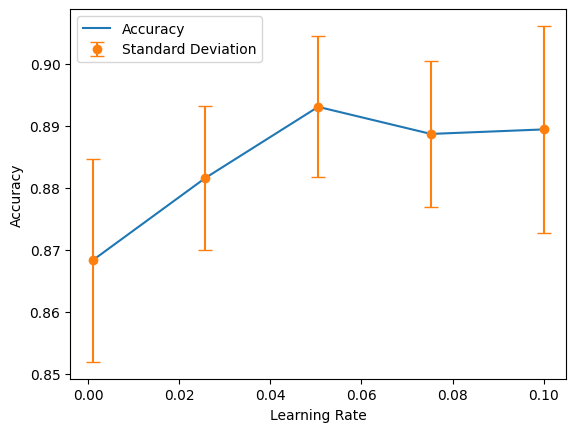

In [91]:
sns.lineplot(x="Learning Rate", y="Accuracy", data=df_res, label="Accuracy")
plt.errorbar(x=df_res["Learning Rate"], y=df_res["Accuracy"], yerr=df_res["Std Deviation"], fmt='o', capsize=5, label="Standard Deviation")
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(0.0, 188.64347259998323)

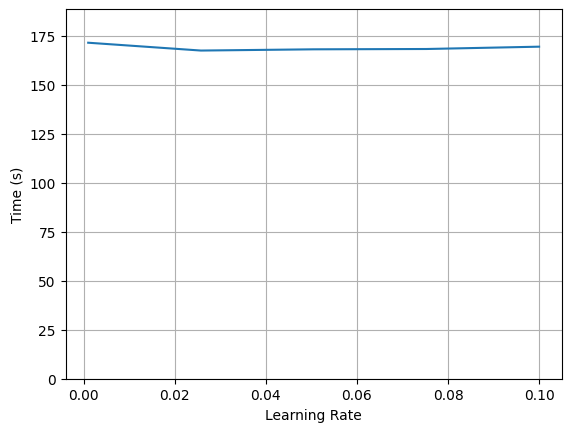

In [92]:
plt.plot(valeurs_eps, times)
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('Time (s)')
plt.ylim(0, max(times) * 1.1)

#### w aléatoire

In [93]:
valeurs_eps = np.linspace(1e-3, 1e-1, 5)
accuracies = []
ecarts = []
times = []
nb_iter = 3
poids_0 = False

for eps in valeurs_eps:
    perceptron = classif.ClassifierPerceptron(Xm.shape[1], eps, poids_0)
    perceptron_multiOAA = classif.ClassifierMultiOAA(perceptron)

    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(perceptron_multiOAA, (Xm, Ym), nb_iter)
    toc = time.time()  # On arrête le chrono
    accuracies.append(taux_moyen)
    ecarts.append(taux_ecart)
    times.append(toc-tic)

    print(f'Temps passe: {(toc-tic):0.4f} secondes.')
    print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\n')

Itération 0: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8249
Itération 1: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8926
Itération 2: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8768
Temps passe: 174.2222 secondes.
Analyse perf: moyenne: 0.8648	ecart: 0.0289

Itération 0: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8820
Itération 1: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.9063
Itération 2: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8702
Temps passe: 172.8832 secondes.
Analyse perf: moyenne: 0.8862	ecart: 0.0150

Itération 0: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8803
Itération 1: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8850
Itération 2: taille base app.= 7332	taille base test= 3660	Taux de bonne classif: 0.8913
Temps passe: 175.2642 secondes.
Analyse perf:

In [94]:
df_res = pd.DataFrame({'Learning Rate': [eps for eps in valeurs_eps],
                       'Accuracy': [acc for acc in accuracies],
                       'Std Deviation': [s for s in ecarts],
                       'Time': [t for t in times]})
print("Temps moyen :", np.array(times).mean())
df_res

Temps moyen : 174.41781601905822


,Learning Rate,Accuracy,Std Deviation,Time
0,0.00100,0.864754,0.028939,174.222168
1,0.02575,0.886157,0.015019,172.883166
2,0.05050,0.885519,0.004478,175.264169
3,0.07525,0.857286,0.010824,175.865452
4,0.10000,0.892077,0.010255,173.854126


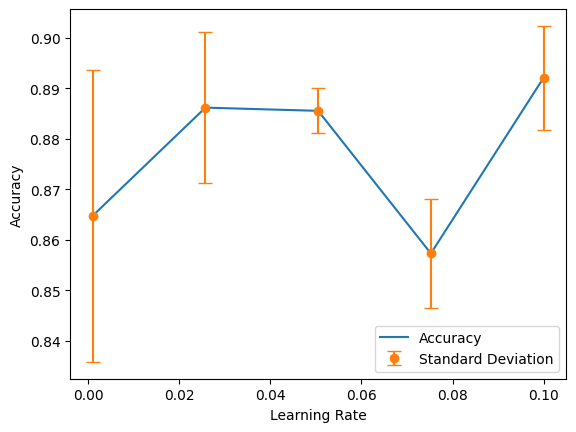

In [95]:
sns.lineplot(x="Learning Rate", y="Accuracy", data=df_res, label="Accuracy")
plt.errorbar(x=df_res["Learning Rate"], y=df_res["Accuracy"], yerr=df_res["Std Deviation"], fmt='o', capsize=5, label="Standard Deviation")
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(0.0, 193.45199699401857)

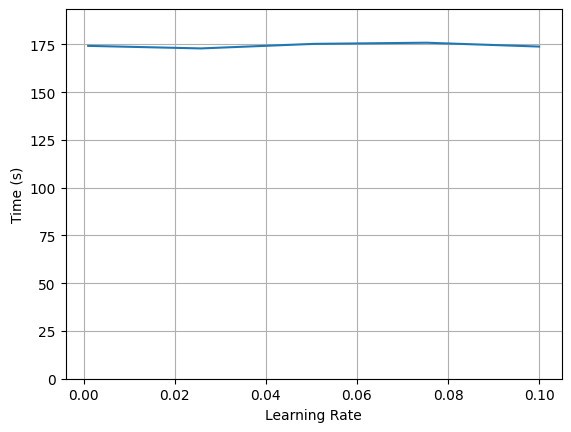

In [96]:
plt.plot(valeurs_eps, times)
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('Time (s)')
plt.ylim(0, max(times) * 1.1)

### Perceptron Biais

Deux fois plus rapide ($80$-$81.5$ s) que la version normale de perceptron et avec $5$ itérations pour la validation croisée, mais le perceptron biais reste toujours trop chronophage et il ne preuve presque aucune précision. Le taux d'apprentissage et comment le tableau de poids est initialisé ne semblent pas influencer la précision. 
Le perceptron qui présente le meilleur compromis entre la précision, la vitesse et le taux d'apprentissage est celui avec $eps=0.075$, les poids nuls ce qui donne une précision de $10.4$%, écart virtuellement nulle dans un temps de $79.2$ s.

#### w initialisé à 0

In [80]:
valeurs_eps = np.linspace(1e-3, 1e-1, 5)
accuracies = []
ecarts = []
times = []
nb_iter = 5
poids_0 = True

for eps in valeurs_eps:
    perceptron = classif.ClassifierPerceptronBiais(Xm.shape[1], eps, poids_0)
    perceptron_multiOAA = classif.ClassifierMultiOAA(perceptron)

    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(perceptron_multiOAA, (Xm, Ym), nb_iter)
    toc = time.time()  # On arrête le chrono
    accuracies.append(taux_moyen)
    ecarts.append(taux_ecart)
    times.append(toc-tic)

    print(f'Temps passe: {(toc-tic):0.4f} secondes.')
    print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\n')

Itération 0: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 1: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 2: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 3: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 4: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Temps passe: 80.0417 secondes.
Analyse perf: moyenne: 0.1039	ecart: 0.0000

Itération 0: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 1: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 2: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 3: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 4: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Temps passe: 80.0928 secondes.
Ana

In [81]:
df_res = pd.DataFrame({'Learning Rate': [eps for eps in valeurs_eps],
                       'Accuracy': [acc for acc in accuracies],
                       'Std Deviation': [s for s in ecarts],
                       'Time': [t for t in times]})
print("Temps moyen :", np.array(times).mean())
df_res

Temps moyen : 80.32024054527282


,Learning Rate,Accuracy,Std Deviation,Time
0,0.00100,0.103872,1.387779e-17,80.041740
1,0.02575,0.103872,1.387779e-17,80.092787
2,0.05050,0.103872,1.387779e-17,81.676246
3,0.07525,0.103872,1.387779e-17,79.170961
4,0.10000,0.103872,1.387779e-17,80.619468


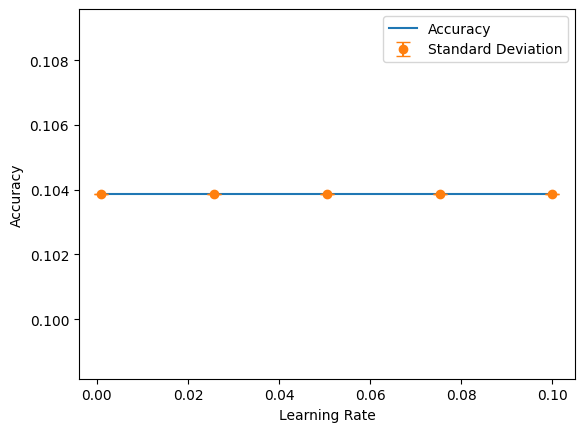

In [82]:
sns.lineplot(x="Learning Rate", y="Accuracy", data=df_res, label="Accuracy")
plt.errorbar(x=df_res["Learning Rate"], y=df_res["Accuracy"], yerr=df_res["Std Deviation"], fmt='o', capsize=5, label="Standard Deviation")
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(0.0, 89.84387078285218)

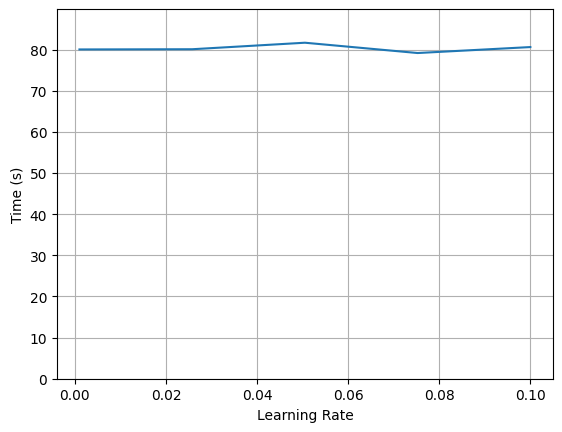

In [83]:
plt.plot(valeurs_eps, times)
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('Time (s)')
plt.ylim(0, max(times) * 1.1)

#### w aléatoire

In [84]:
valeurs_eps = np.linspace(1e-3, 1e-1, 5)
accuracies = []
ecarts = []
times = []
nb_iter = 5
poids_0 = False

for eps in valeurs_eps:
    perceptron = classif.ClassifierPerceptronBiais(Xm.shape[1], eps, poids_0)
    perceptron_multiOAA = classif.ClassifierMultiOAA(perceptron)

    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(perceptron_multiOAA, (Xm, Ym), nb_iter)
    toc = time.time()  # On arrête le chrono
    accuracies.append(taux_moyen)
    ecarts.append(taux_ecart)
    times.append(toc-tic)

    print(f'Temps passe: {(toc-tic):0.4f} secondes.')
    print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\n')

/users/nfs/Etu8/21302798/LU3IN026 - Science des Données/tme-10/../iads/Classifiers.py:273: RuntimeWarning: invalid value encountered in multiply
  self.w += self.eps * (y - f_x) * x
/users/nfs/Etu8/21302798/LU3IN026 - Science des Données/tme-10/../iads/Classifiers.py:218: RuntimeWarning: invalid value encountered in subtract
  difference = np.linalg.norm(self.w - initial_w)


Itération 0: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 1: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 2: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 3: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 4: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Temps passe: 83.5819 secondes.
Analyse perf: moyenne: 0.1039	ecart: 0.0000



/users/nfs/Etu8/21302798/LU3IN026 - Science des Données/tme-10/../iads/Classifiers.py:273: RuntimeWarning: overflow encountered in multiply
  self.w += self.eps * (y - f_x) * x
/users/nfs/Etu8/21302798/LU3IN026 - Science des Données/tme-10/../iads/Classifiers.py:273: RuntimeWarning: invalid value encountered in add
  self.w += self.eps * (y - f_x) * x


Itération 0: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 1: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 2: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 3: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 4: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Temps passe: 83.1258 secondes.
Analyse perf: moyenne: 0.1039	ecart: 0.0000

Itération 0: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 1: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 2: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 3: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Itération 4: taille base app.= 8797	taille base test= 2195	Taux de bonne classif: 0.1039
Temps passe: 81.5248 secondes.
Ana

In [85]:
df_res = pd.DataFrame({'Learning Rate': [eps for eps in valeurs_eps],
                       'Accuracy': [acc for acc in accuracies],
                       'Std Deviation': [s for s in ecarts],
                       'Time': [t for t in times]})
print("Temps moyen :", np.array(times).mean())
df_res

Temps moyen : 81.53272452354432


,Learning Rate,Accuracy,Std Deviation,Time
0,0.00100,0.103872,1.387779e-17,83.581863
1,0.02575,0.103872,1.387779e-17,83.125826
2,0.05050,0.103872,1.387779e-17,81.524850
3,0.07525,0.103872,1.387779e-17,79.644133
4,0.10000,0.103872,1.387779e-17,79.786951


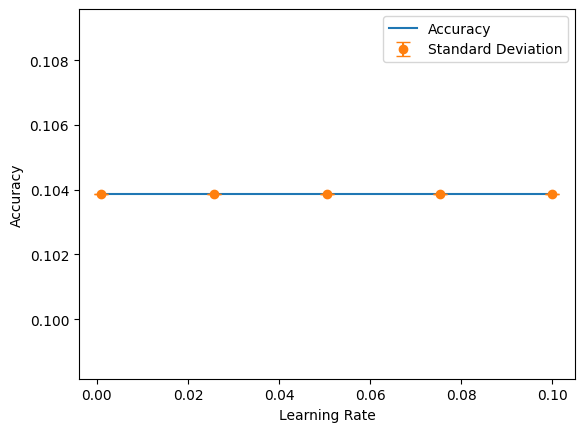

In [88]:
sns.lineplot(x="Learning Rate", y="Accuracy", data=df_res, label="Accuracy")
plt.errorbar(x=df_res["Learning Rate"], y=df_res["Accuracy"], yerr=df_res["Std Deviation"], fmt='o', capsize=5, label="Standard Deviation")
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(0.0, 91.94004974365235)

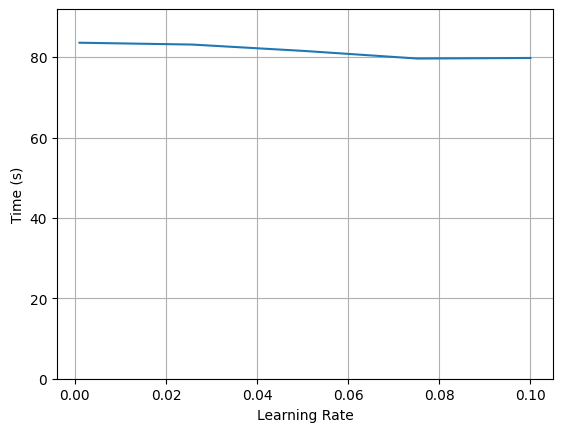

In [87]:
plt.plot(valeurs_eps, times)
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('Time (s)')
plt.ylim(0, max(times) * 1.1)

### Arbre numérique de décision

In [105]:
entropies = np.linspace(0.01, 0.25, 10)
accuracies = []
ecarts = []
times = []
nb_iter = 10

for eps in entropies:
    arbre_numerique = classif.ClassifierArbreNumerique(Xm.shape[1], eps, noms)

    tic = time.time()  # On lance le chrono
    perf, taux_moyen, taux_ecart = ev.validation_croisee(arbre_numerique, (Xm, Ym), nb_iter)
    toc = time.time()  # On arrête le chrono
    accuracies.append(taux_moyen)
    ecarts.append(taux_ecart)
    times.append(toc-tic)

    print(f'Temps passe: {(toc-tic):0.4f} secondes.')
    print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}\n')

Itération 0: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9479
Itération 1: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9507
Itération 2: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9498
Itération 3: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9489
Itération 4: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9507
Itération 5: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9470
Itération 6: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9498
Itération 7: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9452
Itération 8: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9498
Itération 9: taille base app.= 9897	taille base test= 1095	Taux de bonne classif: 0.9543
Temps passe: 91.9169 secondes.
Analyse perf: moyenne: 0.9494	ecart: 0.0023

Itération 0: taille base app.= 989

In [106]:
df_res = pd.DataFrame({'Entropie': [eps for eps in entropies],
                       'Accuracy': [acc for acc in accuracies],
                       'Std Deviation': [s for s in ecarts],
                       'Time': [t for t in times]})
print("Temps moyen :", np.array(times).mean())
df_res

Temps moyen : 72.1710679769516


,Entropie,Accuracy,Std Deviation,Time
0,0.010000,0.949406,0.002318,91.916882
1,0.036667,0.949041,0.002511,85.323772
2,0.063333,0.947489,0.002591,82.976750
3,0.090000,0.945114,0.002178,73.800773
4,0.116667,0.943196,0.002267,72.786201
5,0.143333,0.939909,0.002764,74.510590
6,0.170000,0.938447,0.002318,67.692910
7,0.196667,0.930228,0.004364,65.465134
8,0.223333,0.914703,0.010064,56.145509
9,0.250000,0.909315,0.007962,51.092159


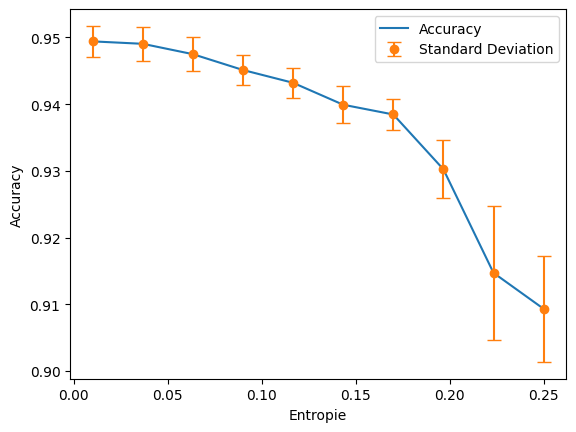

In [107]:
sns.lineplot(x="Entropie", y="Accuracy", data=df_res, label="Accuracy")
plt.errorbar(x=df_res["Entropie"], y=df_res["Accuracy"], yerr=df_res["Std Deviation"], fmt='o', capsize=5, label="Standard Deviation")
plt.xlabel('Entropie')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(0, 0.5, 'Time (s)')

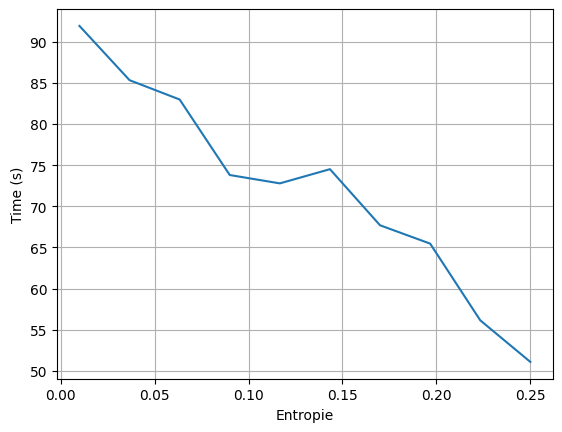

In [109]:
plt.plot(entropies, times)
plt.grid()
plt.xlabel('Entropie')
plt.ylabel('Time (s)')

Le temps diminue presque linéairement avec l'augmentation de l'entropie. Il en va de même pour la précision, mais pas de manière linéaire. Pour éviter le surapprentissage (et aussi ne pas sousapprendre), maintenir une précision plutôt élevée et presque diviser par deux le temps d'exécution, je suggère que le meilleur choix soit une entropie de $0.25$. Cela donne une précision de $90.1$%, robustesse élévée de $0.008$ est s'exécute dans $51.1$ secondes.

Cet arbre possède  138  feuilles.


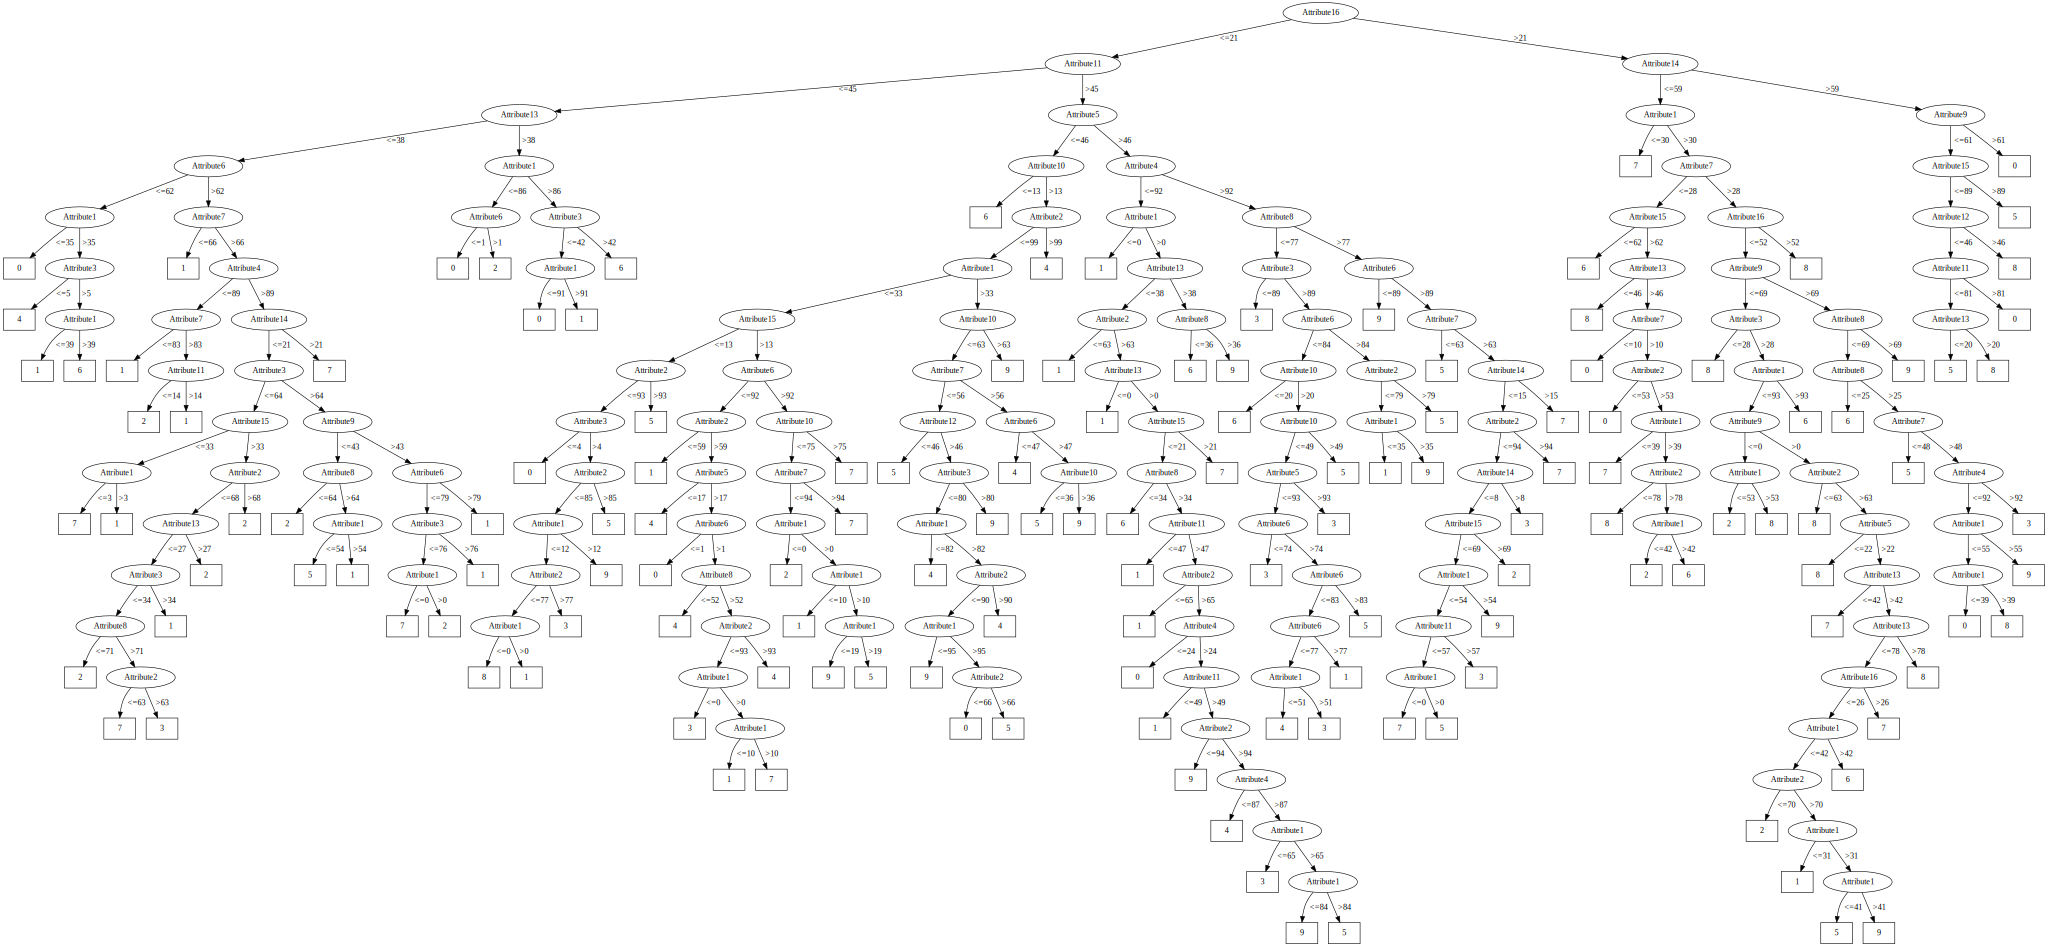

In [113]:
import graphviz as gv

# Initialiation de l'arbre
arbre_meilleur = classif.ClassifierArbreNumerique(desc.shape[1], 0.25, noms)
# Construction de l'arbre de décision à partir du dataset Iris
arbre_meilleur.train(desc, label)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre_meilleur.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre_meilleur.number_leaves()," feuilles.")
graphe_arbre

Par rapport, l'arbre avec une entropie de $0.01$ montre clairement un surapprentissage, en jugent par sa complexité reflétée par le nombre triple de feuilles.

Cet arbre possède  362  feuilles.


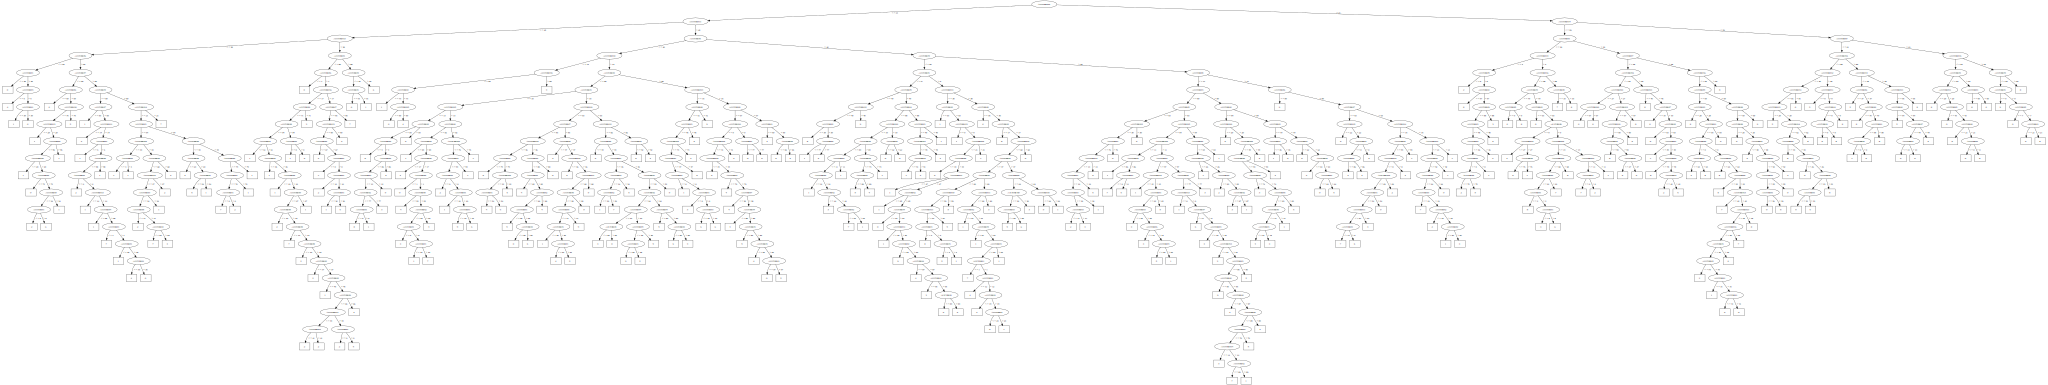

In [114]:
arbre_pire = classif.ClassifierArbreNumerique(desc.shape[1], 0.01, noms)
# Construction de l'arbre de décision à partir du dataset Iris
arbre_pire.train(desc, label)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre_pire.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre_pire.number_leaves()," feuilles.")
graphe_arbre

### Conclusion

Meilleures résulats de la validation croisée pour chaque classifieur :
- KNN : $acc=95.5$%, $s=0.004$, $t=11$ s, $k=104$, nb_iter$=10$
- Perceptron : $acc=89.3$%, $s=0.012$, $t=168.1$ s, $eps=0.05$, nb_iter $ =3$, poids_0 $=True$
- Perceptron biais : $acc=10.4$%, $s=0$, $t=79.2$ s, $eps=0.075$, nb_iter $ =5$, poids_0 $=True$
- Arbre numérique : $acc=90.1$%, $s=0.008$, $t=51.1$ s, $entropie=0.25$, nb_feuilles $=138$, nb_iter $=10$

Par conséquent, le classifieur KNN semble être le choix le plus approprié pour cette tâche de classification, offrant un bon équilibre entre précision et efficacité. Cependant, l'arbre de décision est généralement plus adaptable aux données très complexes, et si les données n'avaient pas été réparties uniformément, le résultat aurait pu être complètement différent, comme vu pour le problème de XOR par exemple.